In [1]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_img_pair(left_img, right_img):
    imgL = cv2.imread(left_img, 0)
    imgL = imgL.astype(int)
    imgR = cv2.imread(right_img, 0)
    imgR = imgR.astype(int)
    return imgL, imgR

In [3]:
def SAD(pixel_vals_1, pixel_vals_2):
    if pixel_vals_1.shape != pixel_vals_2.shape:
        return -1

    return np.sum(abs(pixel_vals_1 - pixel_vals_2))

In [4]:
def find_best_match(h, w, blockL, imgR):
    height, width = imgR.shape
    # Get search range for the right image
    w_min = max(0, w - SEARCH_BLOCK_SIZE)
    w_max = min(width, w + SEARCH_BLOCK_SIZE)
    min_sad = None
    min_index = None
    for wi in range(w_min+BLOCK_SIZE, w_max-BLOCK_SIZE):
        blockR = imgR[h-BLOCK_SIZE: h+BLOCK_SIZE, wi-BLOCK_SIZE: wi+BLOCK_SIZE]
        sad = SAD(blockL, blockR)
        if min_sad == None:
            min_sad = sad
            min_index = (h, wi)
        else:
            if sad < min_sad:
                min_sad = sad
                min_index = (h, wi)
    return min_index

In [5]:
def get_disparity_map(imgL, imgR):
    if imgL.shape != imgR.shape:
        raise "Image pairs mismatch!"
    height, width = imgL.shape
    dm = np.zeros((height, width))
    
    # Loop through each pixel
    for h in range(BLOCK_SIZE, height-BLOCK_SIZE):
        for w in range(BLOCK_SIZE, width-BLOCK_SIZE):
            blockL = imgL[h-BLOCK_SIZE:h + BLOCK_SIZE, w-BLOCK_SIZE:w + BLOCK_SIZE]
            matched = find_best_match(h, w, blockL, imgR)
            #print(matched)
            dm[h, w] = abs(matched[1] - w)
    #print(dm)
    plt.imshow(dm, cmap='gray', interpolation='nearest')
    plt.show()

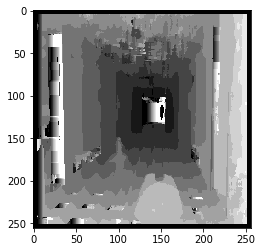

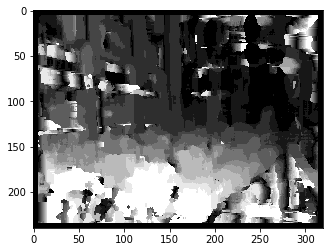

In [6]:
BLOCK_SIZE = 5
SEARCH_BLOCK_SIZE = 16

if __name__ == '__main__':
    images = [["corridorl.jpg", "corridorr.jpg"], ['triclopsi2l.jpg','triclopsi2r.jpg']]
    for img_pair in images:
        imgL, imgR = read_img_pair(img_pair[0], img_pair[1])
        get_disparity_map(imgL, imgR)